In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pymc3 as pm
import chardet
import datetime
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import ExtraTreesClassifier

In [2]:
df = pd.read_csv('../data/denver_prop_listing_clean.csv')

df["list_date"] = pd.to_datetime(df["list_date"])
df["sale_date"] = pd.to_datetime(df["sale_date"])

In [3]:
df

,property_id,zipcode,fips,latitude,longitude,sqft,property_type,has_central_air,has_jacuzzi,has_pool,has_solar,has_garage,current_status,list_date,sale_date
0,138560546,80002,8059,39.79995,-105.08691,1687,SINGLE,False,False,False,False,False,Sale,2018-05-17,2018-07-09
1,138555680,80002,8059,39.79878,-105.10757,2220,SINGLE,False,False,False,False,False,Sale,2019-12-27,2020-01-31
2,138576011,80002,8059,39.79271,-105.14868,1200,SINGLE,False,False,False,False,False,Sale,2019-03-30,2019-05-17
3,138574571,80002,8059,39.79170,-105.13083,2127,SINGLE,False,False,False,False,False,Sale,2017-09-28,2017-10-31
4,138574571,80002,8059,39.79170,-105.13083,2127,SINGLE,False,False,False,False,False,Sale,2019-09-11,2019-10-23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
308878,577709232,80643,8001,39.95822,-104.54549,1996,SINGLE,False,False,False,False,False,Sale,2018-05-07,2018-07-20
308879,503644833,80643,8123,40.10629,-104.52506,1288,SINGLE,False,False,False,False,False,Sale,2018-07-31,2018-09-14
308880,551276799,80643,8123,40.03606,-104.47066,1810,SINGLE,False,False,False,False,False,Sale,2017-08-17,2017-10-11
308881,139419740,80643,8123,40.10923,-104.51945,1000,SINGLE,False,False,False,False,False,Sale,2018-05-11,2018-07-30


In [4]:
agg = df['property_id'].groupby([df.list_date.dt.year, df.list_date.dt.week]).agg(count='count')

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f8f6bb3f610>,
      dtype=object)

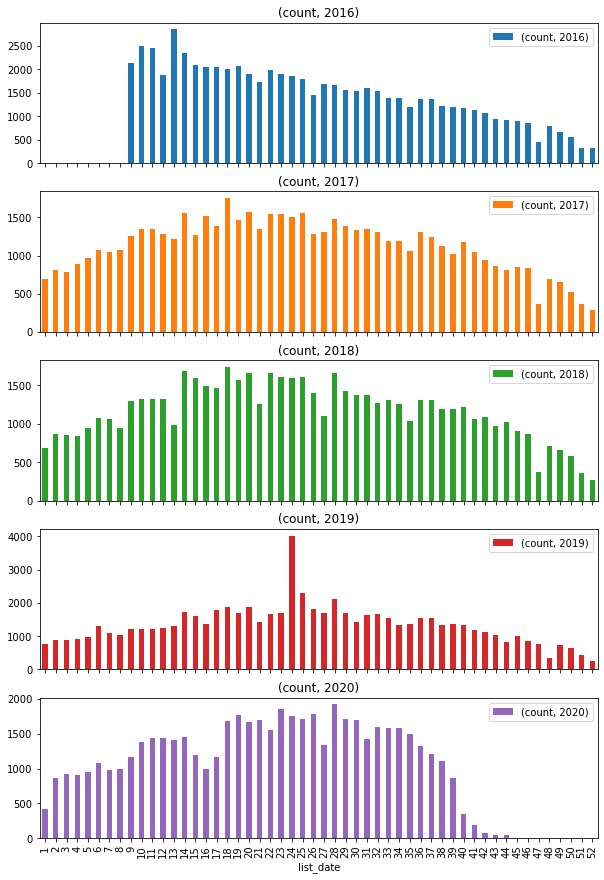

In [5]:
agg.unstack(level=0).plot(kind='bar', subplots=True, figsize=(10,15))

In [6]:
quarter = (df['list_date'] >= pd.to_datetime('2019-4-1')) & (df['list_date'] < pd.to_datetime('2019-7-1'))

In [7]:
small_df = df[quarter].copy()
small_df['list_date'] = pd.to_datetime(small_df['list_date'])
small_df['sale_date'] = pd.to_datetime(small_df['sale_date'])

In [8]:
june = (small_df['list_date'] >= pd.to_datetime('2019-6-1')) & (small_df['list_date'] < pd.to_datetime('2019-7-1'))

In [9]:
small_df['y'] = 0

In [10]:
small_df.loc[june, 'y'] = 1

In [11]:
df

,property_id,zipcode,fips,latitude,longitude,sqft,property_type,has_central_air,has_jacuzzi,has_pool,has_solar,has_garage,current_status,list_date,sale_date
0,138560546,80002,8059,39.79995,-105.08691,1687,SINGLE,False,False,False,False,False,Sale,2018-05-17,2018-07-09
1,138555680,80002,8059,39.79878,-105.10757,2220,SINGLE,False,False,False,False,False,Sale,2019-12-27,2020-01-31
2,138576011,80002,8059,39.79271,-105.14868,1200,SINGLE,False,False,False,False,False,Sale,2019-03-30,2019-05-17
3,138574571,80002,8059,39.79170,-105.13083,2127,SINGLE,False,False,False,False,False,Sale,2017-09-28,2017-10-31
4,138574571,80002,8059,39.79170,-105.13083,2127,SINGLE,False,False,False,False,False,Sale,2019-09-11,2019-10-23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
308878,577709232,80643,8001,39.95822,-104.54549,1996,SINGLE,False,False,False,False,False,Sale,2018-05-07,2018-07-20
308879,503644833,80643,8123,40.10629,-104.52506,1288,SINGLE,False,False,False,False,False,Sale,2018-07-31,2018-09-14
308880,551276799,80643,8123,40.03606,-104.47066,1810,SINGLE,False,False,False,False,False,Sale,2017-08-17,2017-10-11
308881,139419740,80643,8123,40.10923,-104.51945,1000,SINGLE,False,False,False,False,False,Sale,2018-05-11,2018-07-30


In [12]:
print('Values equal 1: {}'.format(small_df['property_id'][small_df['y']== 1].count()))
print('Values equal 0: {}'.format(small_df['property_id'][small_df['y']== 0].count()))   

Values equal 1: 9993
Values equal 0: 14859


In [13]:
dataset = small_df.drop(columns=['property_id', 'list_date', 'sale_date', 'current_status'])

In [14]:
dataset

,zipcode,fips,latitude,longitude,sqft,property_type,has_central_air,has_jacuzzi,has_pool,has_solar,has_garage,y
61,80002,8059,39.797150,-105.085900,1394,CONDO,False,False,False,False,False,0
104,80002,8059,39.796200,-105.120540,2527,SINGLE,False,False,False,False,False,0
132,80002,8059,39.794810,-105.070930,1421,SINGLE,False,False,False,False,False,0
142,80002,8059,39.786990,-105.094710,2113,CONDO,False,False,False,False,False,0
155,80002,8059,39.790566,-105.086278,950,CONDO,False,False,False,False,False,1
...,...,...,...,...,...,...,...,...,...,...,...,...
308851,80643,8001,39.972070,-104.449850,1656,SINGLE,False,False,False,False,False,1
308859,80643,8123,40.103200,-104.520760,1665,SINGLE,False,False,False,False,False,1
308865,80643,8123,40.075910,-104.516870,2860,SINGLE,False,False,False,False,False,0
308869,80643,8123,40.002270,-104.540760,2710,SINGLE,False,False,False,False,True,0


In [15]:
dataset['property_type'].unique()

array(['CONDO', 'SINGLE', 'MULTI_FAMILY', 'LAND', 'OTHER', 'TOWNHOUSE'],
      dtype=object)

In [16]:
mapping = {k: v for v, k in enumerate(dataset.property_type.unique())}
mapping

{'CONDO': 0,
 'SINGLE': 1,
 'MULTI_FAMILY': 2,
 'LAND': 3,
 'OTHER': 4,
 'TOWNHOUSE': 5}

In [17]:
dataset['property_type_code'] = dataset['property_type'].map(mapping)

In [18]:
dataset

,zipcode,fips,latitude,longitude,sqft,property_type,has_central_air,has_jacuzzi,has_pool,has_solar,has_garage,y,property_type_code
61,80002,8059,39.797150,-105.085900,1394,CONDO,False,False,False,False,False,0,0
104,80002,8059,39.796200,-105.120540,2527,SINGLE,False,False,False,False,False,0,1
132,80002,8059,39.794810,-105.070930,1421,SINGLE,False,False,False,False,False,0,1
142,80002,8059,39.786990,-105.094710,2113,CONDO,False,False,False,False,False,0,0
155,80002,8059,39.790566,-105.086278,950,CONDO,False,False,False,False,False,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
308851,80643,8001,39.972070,-104.449850,1656,SINGLE,False,False,False,False,False,1,1
308859,80643,8123,40.103200,-104.520760,1665,SINGLE,False,False,False,False,False,1,1
308865,80643,8123,40.075910,-104.516870,2860,SINGLE,False,False,False,False,False,0,1
308869,80643,8123,40.002270,-104.540760,2710,SINGLE,False,False,False,False,True,0,1


In [19]:
y = dataset['y'].copy()

In [20]:
X = dataset.drop(columns=['y', 'property_type', 'latitude', 'longitude', 'zipcode'])

In [21]:
X

,fips,sqft,has_central_air,has_jacuzzi,has_pool,has_solar,has_garage,property_type_code
61,8059,1394,False,False,False,False,False,0
104,8059,2527,False,False,False,False,False,1
132,8059,1421,False,False,False,False,False,1
142,8059,2113,False,False,False,False,False,0
155,8059,950,False,False,False,False,False,0
...,...,...,...,...,...,...,...,...
308851,8001,1656,False,False,False,False,False,1
308859,8123,1665,False,False,False,False,False,1
308865,8123,2860,False,False,False,False,False,1
308869,8123,2710,False,False,False,False,True,1


In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

In [23]:
X_test

,fips,sqft,has_central_air,has_jacuzzi,has_pool,has_solar,has_garage,property_type_code
275371,8069,2084,False,False,False,False,False,1
116977,8035,2560,False,False,False,False,False,1
148168,8031,857,False,False,False,False,False,0
148748,8031,919,False,False,False,False,False,0
199858,8059,3056,False,False,False,False,False,1
...,...,...,...,...,...,...,...,...
229480,8001,1393,False,False,False,False,False,0
229989,8005,1232,False,False,False,False,False,0
285788,8069,2752,True,False,False,False,False,1
45801,8005,2350,False,False,False,False,False,1


In [24]:
y_test

275371    1
116977    0
148168    0
148748    0
199858    0
         ..
229480    0
229989    0
285788    1
45801     1
105840    0
Name: y, Length: 8202, dtype: int64

In [25]:
logit_reg = LogisticRegression().fit(X_train, y_train)

In [26]:
print('Train set accuracy: {}'.format(logit_reg.score(X_train, y_train)))
print('Test set accuracy: {}'.format(logit_reg.score(X_test, y_test)))

Train set accuracy: 0.6734534534534534
Test set accuracy: 0.6714216044867105


In [27]:
forest = ExtraTreesClassifier(n_estimators=250, random_state=0)

In [28]:
forest.fit(X_train, y_train)

ExtraTreesClassifier(n_estimators=250, random_state=0)

In [29]:
print('Train set accuracy: {}'.format(forest.score(X_train, y_train)))
print('Test set accuracy: {}'.format(forest.score(X_test, y_test)))

Train set accuracy: 0.9096096096096096
Test set accuracy: 0.6127773713728359
